<a href="https://colab.research.google.com/github/SuryARavichan/PYTHON-FOR-DATA-SCIENCE-BDA-/blob/main/car_price_prediction_LR_complete_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
A=pd.read_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
A.shape

(93, 27)

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
#A=A.drop('unnamed 0',axis=1)

In [ ]:
A.shape

(93, 27)

In [ ]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [ ]:
A['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
A['Passengers']=A['Passengers'].astype('object')

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [ ]:
A['Make'].value_counts()

Hyundai Sonata         1
Nissan Sentra          1
Mitsubishi Mirage      1
Mitsubishi Diamante    1
Ford Mustang           1
                      ..
Chevrolet Astro        1
BMW 535i               1
Chevrolet Camaro       1
Volkswagen Corrado     1
Lexus SC300            1
Name: Make, Length: 93, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


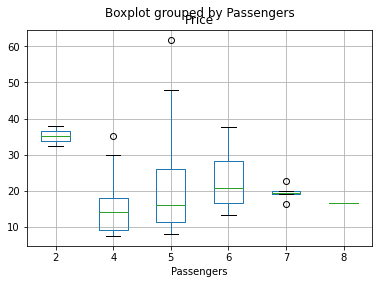

In [ ]:
A.boxplot(column='Price',by='Passengers')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


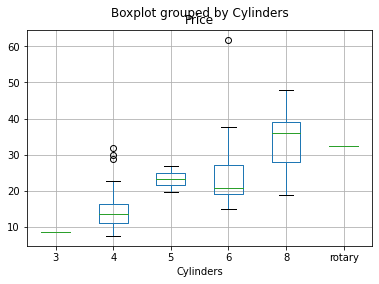

In [ ]:
A.boxplot(column='Price',by='Cylinders')

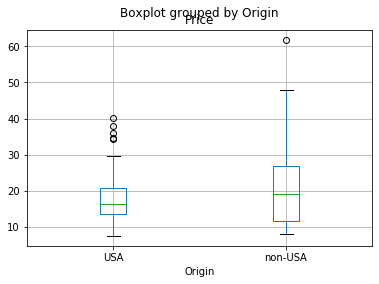

In [ ]:
A.boxplot(column='Price',by='Origin')

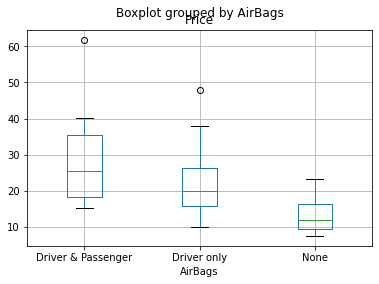

In [ ]:
A.boxplot(column='Price',by='AirBags')

In [ ]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

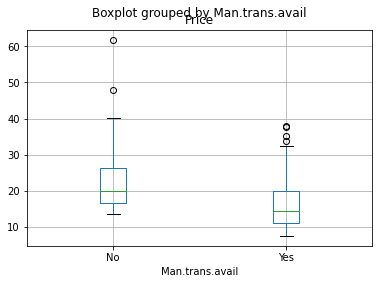

In [ ]:
A.boxplot(column='Price',by='Man.trans.avail')

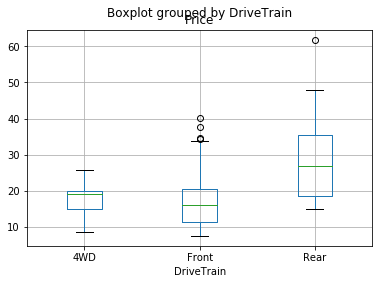

In [ ]:
A.boxplot(column='Price',by='DriveTrain')

In [ ]:
A.boxplot(column='Price',by='Man.trans.avail')

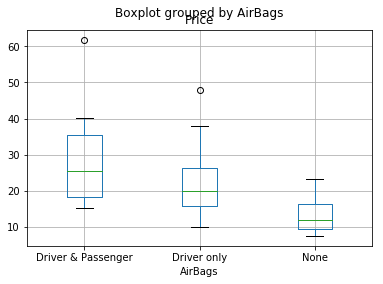

In [ ]:
A.boxplot(column='Price',by='AirBags')

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
#Bigdata (10K to 100K) = dropna
#Dataset size (500-2000)upto 5-10% of size of n = Median Imputation or random sampling
#Dataset around 1000, 10-20% of record is missing = KNN Imputer (preserve your distribution)

In [ ]:
A['Rear.seat.room'].fillna(A['Rear.seat.room'].median(),inplace=True)
A['Luggage.room'].fillna(A['Luggage.room'].median(),inplace=True)

In [ ]:
test=pd.DataFrame({'x1':[3,8,np.nan,5,10],'x2':[5,2,7,8,9],'x3':[np.nan,9,8,2,5]})
test

,x1,x2,x3
0,3.0,5,NaN
1,8.0,2,9.0
2,NaN,7,8.0
3,5.0,8,2.0
4,10.0,9,5.0


In [ ]:
from sklearn.impute import KNNImputer
#by default it is recursive

In [ ]:
Imp=KNNImputer(n_neighbors=2)
Imp.fit_transform(test)

array([[ 3. ,  5. ,  5. ],
       [ 8. ,  2. ,  9. ],
       [ 6.5,  7. ,  8. ],
       [ 5. ,  8. ,  2. ],
       [10. ,  9. ,  5. ]])

In [ ]:
#using KNN imputer (n_neigh=2)
#test-1=8
#test-3=5
#test-4=11

In [ ]:
B.shape

(93, 22)

In [ ]:
#Create a B data frame by dropping unwanted columns based on business context
B=A.drop(['Manufacturer','Model','Min.Price','Max.Price','Make'],axis=1)
B.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [ ]:
B.shape

(93, 22)

In [ ]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                93 non-null     object 
 1   Price               93 non-null     float64
 2   MPG.city            93 non-null     int64  
 3   MPG.highway         93 non-null     int64  
 4   AirBags             93 non-null     object 
 5   DriveTrain          93 non-null     object 
 6   Cylinders           93 non-null     object 
 7   EngineSize          93 non-null     float64
 8   Horsepower          93 non-null     int64  
 9   RPM                 93 non-null     int64  
 10  Rev.per.mile        93 non-null     int64  
 11  Man.trans.avail     93 non-null     object 
 12  Fuel.tank.capacity  93 non-null     float64
 13  Passengers          93 non-null     int64  
 14  Length              93 non-null     int64  
 15  Wheelbase           93 non-null     int64  
 16  Width     

In [ ]:
df_cat = B.select_dtypes(include=[object])

# display categorical features
df_cat.columns

Index(['Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail',
       'Passengers', 'Origin'],
      dtype='object')

In [ ]:
df_cat.head()

,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Passengers,Origin
1,Small,None,Front,4,Yes,5,non-USA
2,Midsize,Driver & Passenger,Front,6,Yes,5,non-USA
3,Compact,Driver only,Front,6,Yes,5,non-USA
4,Midsize,Driver & Passenger,Front,6,Yes,6,non-USA
5,Midsize,Driver only,Rear,4,Yes,4,non-USA


In [ ]:
dummy_var = pd.get_dummies(data = df_cat, drop_first=True)
dummy_var.shape

(93, 21)

In [ ]:
dummy_var.head()

,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1
2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1
5,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1


In [ ]:
B['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [ ]:
X=B.drop('Price',axis=1)
X.shape

(93, 21)

In [ ]:
df_num = B.select_dtypes(include=[np.number])
df_num.shape

(93, 15)

In [ ]:
df_num.corr()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Price,1.000000,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.297898,0.355827,0.647179
MPG.city,-0.594562,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.378071,-0.466621,-0.843139
MPG.highway,-0.560680,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.362379,-0.333507,-0.810658
EngineSize,0.597425,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.471733,0.620915,0.845075
Horsepower,0.788218,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.230654,0.331115,0.738798
RPM,-0.004955,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.335709,-0.484468,-0.427931
Rev.per.mile,-0.426395,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.368190,-0.559548,-0.735264
Fuel.tank.capacity,0.619480,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.501265,0.534164,0.894018
Passengers,0.057860,-0.416856,-0.466386,0.372721,0.009264,-0.467138,-0.334976,0.472095,1.000000,0.485294,0.694054,0.489979,0.449025,0.629517,0.423096,0.553273
Length,0.503628,-0.666239,-0.542897,0.780283,0.550865,-0.441249,-0.690233,0.690461,0.485294,1.000000,0.823650,0.822148,0.738955,0.548276,0.699806,0.806274


In [ ]:
X_final = pd.concat([df_num, dummy_var], axis=1)

# display first five observations
X_final.shape

(93, 36)

In [ ]:
X_final.head()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,15.9,25,31,1.8,140,6300,2890,13.2,177,102,...,0,0,0,1,0,1,0,0,0,1
2,33.9,18,25,3.2,200,5500,2335,18.0,195,115,...,1,0,0,1,0,1,0,0,0,1
3,29.1,20,26,2.8,172,5500,2280,16.9,180,102,...,1,0,0,1,0,1,0,0,0,1
4,37.7,19,26,2.8,172,5500,2535,21.1,193,106,...,1,0,0,1,0,0,1,0,0,1
5,30.0,22,30,3.5,208,5700,2545,21.1,186,109,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
Y=B['Price']
Y.shape

(93,)

In [ ]:
X_final=X_final.drop('Price',axis=1)

In [ ]:
X_final.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,25,31,1.8,140,6300,2890,13.2,177,102,68,...,0,0,0,1,0,1,0,0,0,1
2,18,25,3.2,200,5500,2335,18.0,195,115,71,...,1,0,0,1,0,1,0,0,0,1
3,20,26,2.8,172,5500,2280,16.9,180,102,67,...,1,0,0,1,0,1,0,0,0,1
4,19,26,2.8,172,5500,2535,21.1,193,106,70,...,1,0,0,1,0,0,1,0,0,1
5,22,30,3.5,208,5700,2545,21.1,186,109,69,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
Xc = sm.add_constant(X_final)
model = sm.OLS(Y,Xc).fit()
model.summary()    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.77e-14
Time:                        10:15:44   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 110.8270     35.770      3.098      0.003      39.226     182.428
MPG.city               -0.3244      0.432     -0.750      0.456      -1.190       0.541
MPG.highway             0.1691      0.398      0.425      0.672      -0.627       0.965
EngineSize             -1.6774      2.828     -0.593      0.555      -7.337       3.983
Horsepower              0.1388      0.045      3.088      0.003       0.049       0.229
RPM                    -0.0026      0.002     -1.169      0.247      -0.007       0.002
Rev.per.mile            0.0017      0.002      0.771      0.444      -0.003       0.006
Fuel.tank.capacity      0.4672      0.540      0.865      0.391      -0.614       1.549
Length                  0.0485      0.110      0.443      0.660      -0.171       0.268
Wheelbase               0.3850      0.274      1.407      0.165      -0.163       0.933
Width                  -1.9087      0.544     -3.511      0.001      -2.997      -0.820
Turn.circle            -0.6224      0.365     -1.703      0.094      -1.354       0.109
Rear.seat.room          0.3343      0.359      0.932      0.355      -0.384       1.053
Luggage.room            0.2737      0.339      0.808      0.423      -0.405       0.952
Weight                 -0.0013      0.006     -0.237      0.813      -0.013       0.010
Type_Large              1.5368      4.227      0.364      0.718      -6.925       9.999
Type_Midsize            3.9322      2.457      1.601      0.115      -0.986       8.850
Type_Small              1.1903      2.657      0.448      0.656      -4.129       6.509
Type_Sporty             6.5059      3.371      1.930      0.059      -0.242      13.254
Type_Van                3.6835      7.196      0.512      0.611     -10.722      18.089
AirBags_Driver only    -3.7364      1.897     -1.970      0.054      -7.533       0.060
AirBags_None           -8.3008      2.181     -3.806      0.000     -12.666      -3.936
DriveTrain_Front        2.2805      2.297      0.993      0.325      -2.318       6.879
DriveTrain_Rear         7.2573      2.915      2.490      0.016       1.423      13.092
Cylinders_4            -2.1621      4.446     -0.486      0.629     -11.061       6.737
Cylinders_5            -3.5966      6.722     -0.535      0.595     -17.052       9.859
Cylinders_6             0.8184      5.614      0.146      0.885     -10.419      12.056
Cylinders_8             3.4500      6.832      0.505      0.616     -10.226      17.126
Cylinders_rotary      -15.0831     12.735     -1.184      0.241     -40.576      10.410
Man.trans.avail_Yes    -1.9656      2.167     -0.907      0.368      -6.303       2.372
Passengers_4           -5.4956      7.065     -0.778      0.440     -19.638       8.646
Passengers_5           -2.3710      7.490     -0.317      0.753     -17.363      12.621
Pas

In [ ]:
p = pd.Series(model.pvalues.values[1:],index = X_final.columns)      
pmax = max(p)
feature_with_p_max = p.idxmax()
print(pmax)
print(feature_with_p_max)

0.8664931528048668
Type_Large


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [ ]:
# functions for forward selection (standalone machine can use mlxtend)
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg_forward = sfs(estimator = linreg, n_features_to_select= 12,direction='forward')
#k_features in mlxtend, forward=True, sfs_forward.k_feature_names
sfs_forward = linreg_forward.fit(X_final, Y)

In [ ]:
sfs_forward.get_support()

array([False,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True])

In [ ]:
sfs_fwd_X=X_final[X_final.columns[sfs_forward.get_support()]]

In [ ]:
sfs_fwd_xc=sm.add_constant(sfs_fwd_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model1=sm.OLS(Y,sfs_fwd_xc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     23.88
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.33e-21
Time:                        10:55:24   Log-Likelihood:                -271.59
No. Observations:                  93   AIC:                             569.2
Df Residuals:                      80   BIC:                             602.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              43.6429     18.143      2.405      0.018       7.537      79.749
MPG.highway        -0.2706      0.157     -1.725      0.088      -0.583       0.042
Horsepower          0.1029      0.016      6.250      0.000       0.070       0.136
Width              -0.6975      0.255     -2.730      0.008      -1.206      -0.189
Rear.seat.room      0.5791      0.237      2.441      0.017       0.107       1.051
Type_Midsize        3.9929      1.303      3.064      0.003       1.400       6.586
Type_Small         -1.5737      1.840     -0.855      0.395      -5.235       2.087
AirBags_None       -3.6092      1.253     -2.881      0.005      -6.102      -1.116
DriveTrain_Rear     4.6511      1.617      2.876      0.005       1.432       7.870
Cylinders_8         2.6626      2.503      1.064      0.291      -2.318       7.643
Passengers_4       -0.1131      1.553     -0.073      0.942      -3.203       2.977
Passengers_8        0.0098      5.329      0.002      0.999     -10.596      10.616
Origin_non-USA      2.0201      1.222      1.653      0.102      -0.413       4.453
==============================================================================
Omnibus:                       55.636   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.250
Skew:                           1.821   Prob(JB):                     7.71e-65
Kurtosis:                      10.933   Cond. No.                     6.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
linreg_backward = sfs(estimator = linreg, n_features_to_select= 12,direction='backward')
#k_features in mlxtend, forward=True, sfs_forward.k_feature_names
sfs_backward = linreg_backward.fit(X_final, Y)

In [ ]:
X_final.columns[sfs_backward.get_support()]

Index(['Horsepower', 'Wheelbase', 'Width', 'Rear.seat.room', 'Type_Midsize',
       'Type_Sporty', 'Type_Van', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_Rear', 'Cylinders_8', 'Passengers_5'],
      dtype='object')

In [ ]:
sfs_bk_X=X_final[X_final.columns[sfs_backward.get_support()]]

In [ ]:
sfs_bk_xc=sm.add_constant(sfs_bk_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model2=sm.OLS(Y,sfs_bk_xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     27.12
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.69e-23
Time:                        11:22:27   Log-Likelihood:                -266.91
No. Observations:                  93   AIC:                             559.8
Df Residuals:                      80   BIC:                             592.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  43.3227     14.737      2.940      0.004      13.995      72.650
Horsepower              0.1184      0.015      8.070      0.000       0.089       0.148
Wheelbase               0.4140      0.172      2.405      0.018       0.071       0.757
Width                  -1.3917      0.278     -5.007      0.000      -1.945      -0.839
Rear.seat.room          0.4848      0.255      1.902      0.061      -0.022       0.992
Type_Midsize            4.4421      1.368      3.248      0.002       1.720       7.164
Type_Sporty             2.6643      2.169      1.228      0.223      -1.653       6.982
Type_Van                4.3943      2.313      1.899      0.061      -0.210       8.998
AirBags_Driver only    -3.5243      1.495     -2.357      0.021      -6.500      -0.549
AirBags_None           -6.8580      1.849     -3.709      0.000     -10.538      -3.178
DriveTrain_Rear         5.2468      1.541      3.405      0.001       2.180       8.314
Cylinders_8             2.9895      2.370      1.261      0.211      -1.727       7.705
Passengers_5            0.7218      1.255      0.575      0.567      -1.775       3.219
==============================================================================
Omnibus:                       32.693   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.041
Skew:                           1.221   Prob(JB):                     9.29e-19
Kurtosis:                       6.933   Cond. No.                     6.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2.pvalues.values

array([4.29270612e-03, 5.89169688e-12, 1.84722898e-02, 3.22378565e-06,
       6.07618238e-02, 1.69978214e-03, 2.22984412e-01, 6.11147858e-02,
       2.08710333e-02, 3.83067885e-04, 1.03797799e-03, 2.10795798e-01,
       5.66716187e-01])

In [ ]:
rfe_model = RFE(estimator=linreg, n_features_to_select = 12)
rfe_model.fit(X_final, Y)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_final.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

In [ ]:
#Feature Selection by Recursive Backward Elimination
cols=list(X_final.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_final = X_final[cols]
    Xc = sm.add_constant(X_final)
    model_full = sm.OLS(Y,Xc).fit()
    p = pd.Series(model_full.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols


In [ ]:
print(selected_features)

['Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear']


In [ ]:
X_new=X_final[selected_features]
X_new.shape

(93, 8)

In [ ]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()


# create a column of variable names
vif["Features"] = X_new.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# print the VIF
print(vif)

              Features         VIF
0           Horsepower   23.799576
1   Fuel.tank.capacity   81.415495
2            Wheelbase  832.603696
3                Width  810.750811
4         Type_Midsize    1.588516
5  AirBags_Driver only    3.832198
6         AirBags_None    3.877403
7      DriveTrain_Rear    1.501066


In [ ]:
X_new.columns

Index(['Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width',
       'Type_Midsize', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_Rear'],
      dtype='object')

In [ ]:
X_final_prod=X_new.drop(['Fuel.tank.capacity','Wheelbase','Width'],axis=1)
X_final_prod.head()

,Horsepower,Type_Midsize,AirBags_Driver only,AirBags_None,DriveTrain_Rear
1,140,0,0,1,0
2,200,1,0,0,0
3,172,0,1,0,0
4,172,1,0,0,0
5,208,1,1,0,1


In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
model_final=LinearRegression()

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(model_final,X_final_prod,Y,cv=kf,scoring='neg_root_mean_squared_error')
print('Bias Error',np.mean(np.abs(scores)))
print('Var Error',np.std(np.abs(scores),ddof=1))

Bias Error 5.912328701186055
Var Error 1.1524039201464258


Index(['Horsepower', 'Passengers', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Type_Midsize', 'Type_Sporty', 'AirBags_None',
       'DriveTrain_Rear', 'Cylinders_6', 'Cylinders_8'],
      dtype='object')


(93, 8)

In [ ]:
X_new.columns

Index(['Horsepower', 'Passengers', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Type_Midsize', 'Type_Sporty', 'AirBags_None',
       'DriveTrain_Rear', 'Cylinders_6', 'Cylinders_8'],
      dtype='object')

In [ ]:
X_new_c=sm.add_constant(X_new)

In [ ]:
model3=sm.OLS(Y,X_new_c).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     40.08
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.51e-25
Time:                        11:45:16   Log-Likelihood:                -269.27
No. Observations:                  93   AIC:                             556.5
Df Residuals:                      84   BIC:                             579.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  45.2793     13.385      3.383      0.001      18.662      71.897
Horsepower              0.1137      0.015      7.468      0.000       0.083       0.144
Fuel.tank.capacity      0.6133      0.305      2.011      0.047       0.007       1.220
Wheelbase               0.4644      0.135      3.430      0.001       0.195       0.734
Width                  -1.4171      0.268     -5.283      0.000      -1.951      -0.884
Type_Midsize            2.8692      1.244      2.307      0.024       0.396       5.342
AirBags_Driver only    -3.3025      1.435     -2.301      0.024      -6.157      -0.448
AirBags_None           -6.1950      1.680     -3.687      0.000      -9.536      -2.854
DriveTrain_Rear         4.6664      1.420      3.286      0.001       1.842       7.491
==============================================================================
Omnibus:                       25.799   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.756
Skew:                           0.968   Prob(JB):                     6.41e-14
Kurtosis:                       6.454   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_new.corr()

,Horsepower,Fuel.tank.capacity,Wheelbase,Width,Type_Midsize,AirBags_Driver only,AirBags_None,DriveTrain_Rear
Horsepower,1.000000,0.711790,0.486854,0.644413,0.312701,0.141756,-0.422675,0.405132
Fuel.tank.capacity,0.711790,1.000000,0.757674,0.798719,0.304716,0.132412,-0.295672,0.321158
Wheelbase,0.486854,0.757674,1.000000,0.807213,0.284184,0.112275,-0.333027,0.230428
Width,0.644413,0.798719,0.807213,1.000000,0.186609,0.119447,-0.361143,0.363675
Type_Midsize,0.312701,0.304716,0.284184,0.186609,1.000000,0.042018,-0.212413,0.081458
AirBags_Driver only,0.141756,0.132412,0.112275,0.119447,0.042018,1.000000,-0.703984,0.148693
AirBags_None,-0.422675,-0.295672,-0.333027,-0.361143,-0.212413,-0.703984,1.000000,-0.286884
DriveTrain_Rear,0.405132,0.321158,0.230428,0.363675,0.081458,0.148693,-0.286884,1.000000


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics

In [ ]:
LR=LinearRegression()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=.3,random_state=0)

In [ ]:
LR.fit(xtrain,ytrain)
y_pred_test=LR.predict(xtest)
mse=metrics.mean_squared_error(ytest,y_pred_test)
rmse_test=np.sqrt(mse)
print(rmse_test)

5.087799939802419


In [ ]:
y_pred_train=LR.predict(xtrain)
mse=metrics.mean_squared_error(ytrain,y_pred_train)
rmse_train=np.sqrt(mse)
print(rmse_train)

3.8792365049307524


In [ ]:
#since testrmse>trainrmse, slightly model overfits

In [ ]:
#k-fold cross validation

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_root_mean_squared_error')
print(scores)

[-5.10016546 -4.15401561 -5.56771874]


In [ ]:
print('Bias_Error',np.mean(np.abs(scores)))
print('Variance_Error',np.std(np.abs(scores),ddof=1))

Bias_Error 4.9406332700900455
Variance_Error 0.7202270652266595


In [ ]:
X_new['Horsepower'].std()

52.37440954443844

In [ ]:
np.std(X_new['Horsepower'],ddof=1)

52.37440954443844

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
rmse=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_root_mean_squared_error')
LR_be=np.mean(np.abs(rmse))
LR_ve=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',LR_be)
print('VAR_Error',LR_ve)

Bias_Error 4.9406332700900455
VAR_Error 0.7202270652266595


In [ ]:
rmse

array([-5.10016546, -4.15401561, -5.56771874])

In [ ]:
X_new['Horsepower'].std()

52.37440954443844

In [ ]:
np.std(X_new['Horsepower'],ddof=1)

52.37440954443844

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=0.3,random_state=0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((65, 7), (28, 7), (65,), (28,))

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics

In [ ]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
y_pred_test=LR.predict(xtest)
y_pred_test

array([22.95454693,  5.74671113, 16.90558687, 10.37405413, 22.05428052,
       34.05018862,  8.73566671, 10.33931377, 19.91112279, 17.26004655,
       11.32517388, 24.46271949, 32.9551327 , 24.07111088, 10.43679271,
       12.76492285, 22.25231249, 10.12754192, 17.43861086, 29.67791224,
       17.65376219, 26.42643131, 14.376249  , 18.76302745, 15.36047435,
        8.09267207, 14.17462885, 26.57949928])

In [ ]:
#RMSE for test record
mse_test=metrics.mean_squared_error(ytest,y_pred_test)
rmse_test=np.sqrt(mse_test)
print(rmse_test)

4.683666032383939


In [ ]:
y_pred_train=LR.predict(xtrain)
#RMSE for train record
mse_train=metrics.mean_squared_error(ytrain,y_pred_train)
rmse_train=np.sqrt(mse_train)
print(rmse_train)

4.551594659097972


In [ ]:
LR=LinearRegression()
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=3,shuffle=True,random_state=0) #explicit definition
mse=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(mse))
rmse_avg=np.mean(rmse)
rmse_sd=np.std(rmse,ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 5.218925437412404
Var_Error 0.8735244870523378


In [ ]:
rmse

array([4.46042654, 5.02236711, 6.17398266])